### Merging all CSV files into one

In [1]:
import tensorflow as tf
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('./daejeon_vds16.csv')
df.head()

,Date,ToVol,SmVol,MeVol,LaVol,Speed,Occ.Rate
0,2017-04-02 0:00,43,34,9,0,50.3,1.90
1,2017-04-02 0:05,45,32,13,0,58.9,1.84
2,2017-04-02 0:10,46,34,12,0,50.6,1.87
3,2017-04-02 0:15,45,36,9,0,50.9,1.72
4,2017-04-02 0:20,27,13,13,1,62.2,1.12


### Descriptive Analysis

In [4]:
df.describe()

,ToVol,SmVol,MeVol,LaVol,Speed,Occ.Rate
count,8064.000000,8064.000000,8064.000000,8064.000000,8064.000000,8064.000000
mean,110.459945,79.353299,29.948537,1.158110,49.327431,6.166941
std,63.954451,46.802106,19.081136,1.530192,7.921856,6.739946
min,6.000000,2.000000,0.000000,0.000000,9.100000,0.230000
25%,50.000000,35.000000,13.000000,0.000000,44.900000,2.140000
50%,122.000000,87.000000,29.000000,1.000000,48.500000,5.550000
75%,155.000000,111.000000,44.000000,2.000000,54.200000,7.290000
max,338.000000,250.000000,145.000000,16.000000,87.800000,82.100000


### Getting new features

In [5]:
df['timestamp'] = df['Date'].astype('datetime64[ns]')

In [6]:
df.head()

,Date,ToVol,SmVol,MeVol,LaVol,Speed,Occ.Rate,timestamp
0,2017-04-02 0:00,43,34,9,0,50.3,1.90,2017-04-02 00:00:00
1,2017-04-02 0:05,45,32,13,0,58.9,1.84,2017-04-02 00:05:00
2,2017-04-02 0:10,46,34,12,0,50.6,1.87,2017-04-02 00:10:00
3,2017-04-02 0:15,45,36,9,0,50.9,1.72,2017-04-02 00:15:00
4,2017-04-02 0:20,27,13,13,1,62.2,1.12,2017-04-02 00:20:00


In [7]:
df['weekday'] = df['timestamp'].dt.weekday

In [8]:
# Feature engineering with the date
df['year']= df['timestamp'].dt.year 
df['month']= df['timestamp'].dt.month 
df['day']= df['timestamp'].dt.day

df['minute']= df['timestamp'].dt.minute
df['hour']= df['timestamp'].dt.hour

In [9]:
df.index

RangeIndex(start=0, stop=8064, step=1)

In [10]:
df['hour-minute']=df.index

In [11]:
df.tail(5)

,Date,ToVol,SmVol,MeVol,LaVol,Speed,Occ.Rate,timestamp,weekday,year,month,day,minute,hour,hour-minute
8059,2017-04-29 23:35,45,35,10,0,51.3,2.01,2017-04-29 23:35:00,5,2017,4,29,35,23,8059
8060,2017-04-29 23:40,47,33,14,0,53.9,1.89,2017-04-29 23:40:00,5,2017,4,29,40,23,8060
8061,2017-04-29 23:45,32,28,4,0,50.6,1.36,2017-04-29 23:45:00,5,2017,4,29,45,23,8061
8062,2017-04-29 23:50,31,21,10,0,59.3,1.40,2017-04-29 23:50:00,5,2017,4,29,50,23,8062
8063,2017-04-29 23:55,39,33,6,0,52.5,1.74,2017-04-29 23:55:00,5,2017,4,29,55,23,8063


In [12]:
original_df = df.copy()

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8064 entries, 0 to 8063
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         8064 non-null   object        
 1   ToVol        8064 non-null   int64         
 2   SmVol        8064 non-null   int64         
 3   MeVol        8064 non-null   int64         
 4   LaVol        8064 non-null   int64         
 5   Speed        8064 non-null   float64       
 6   Occ.Rate     8064 non-null   float64       
 7   timestamp    8064 non-null   datetime64[ns]
 8   weekday      8064 non-null   int64         
 9   year         8064 non-null   int64         
 10  month        8064 non-null   int64         
 11  day          8064 non-null   int64         
 12  minute       8064 non-null   int64         
 13  hour         8064 non-null   int64         
 14  hour-minute  8064 non-null   int64         
dtypes: datetime64[ns](1), float64(2), int64(11), object(1)


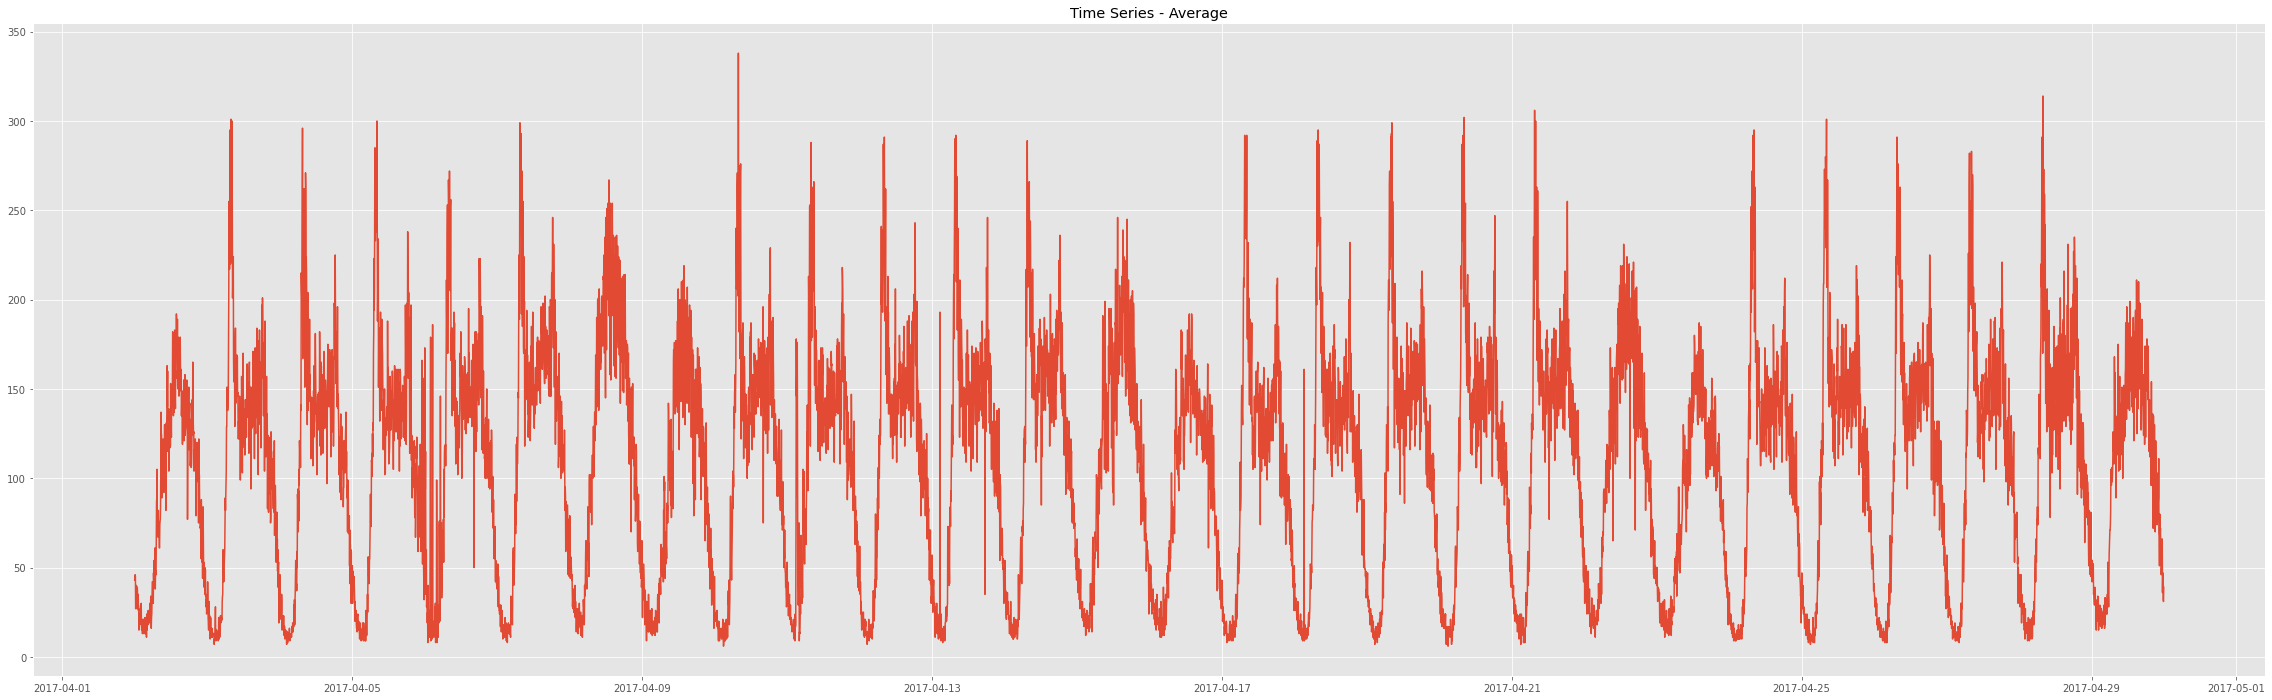

In [14]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

plt.figure(figsize=(40, 12))
mean_group = df[['timestamp','ToVol']].groupby(['timestamp'])['ToVol'].mean()
plt.plot(mean_group)
plt.title('Time Series - Average')
plt.show()

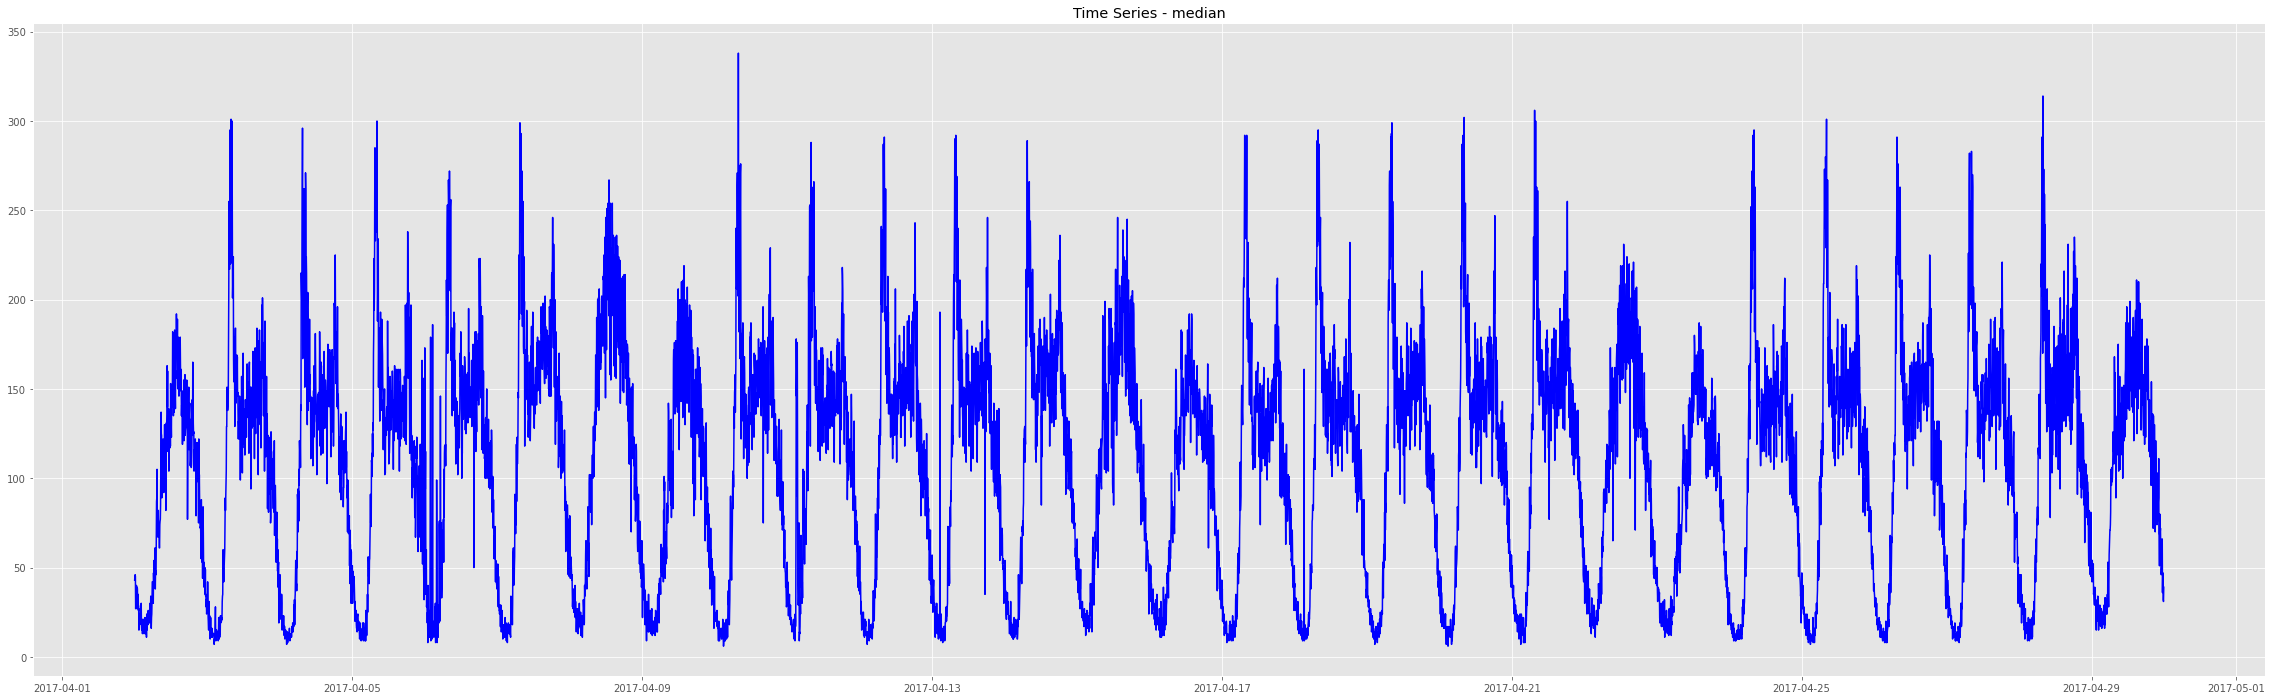

In [15]:
plt.figure(figsize=(40, 12))
median_group = df[['timestamp','ToVol']].groupby(['timestamp'])['ToVol'].median()
plt.plot(median_group, color = 'b')
plt.title('Time Series - median')
plt.show()

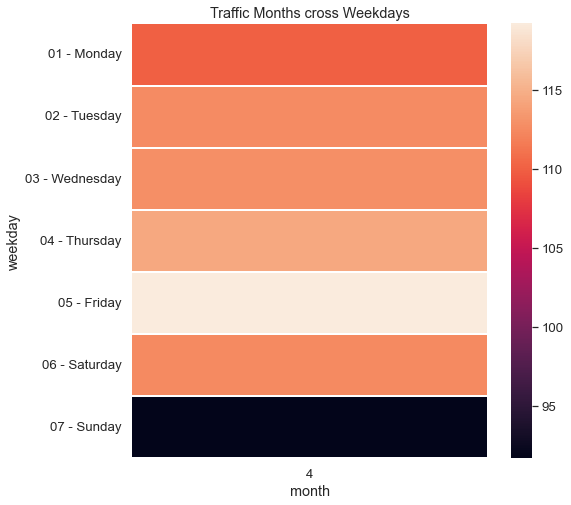

In [16]:
# For the next graphic


df['weekday_num'] = df['weekday']
df['weekday'].replace(0,'01 - Monday',inplace=True)
df['weekday'].replace(1,'02 - Tuesday',inplace=True)
df['weekday'].replace(2,'03 - Wednesday',inplace=True)
df['weekday'].replace(3,'04 - Thursday',inplace=True)
df['weekday'].replace(4,'05 - Friday',inplace=True)
df['weekday'].replace(5,'06 - Saturday',inplace=True)
df['weekday'].replace(6,'07 - Sunday',inplace=True)

train_group = df.groupby(["month", "weekday"])['ToVol'].mean().reset_index()
train_group = train_group.pivot('weekday','month','ToVol')
train_group.sort_index(inplace=True)

import seaborn as sns
sns.set(font_scale=1.2) 

# Draw a heatmap with the numeric values in each cell
f, ax = plt.subplots(figsize=(8, 8))
sns.heatmap(train_group, annot=False, ax=ax, fmt="d", linewidths=2)
plt.title('Traffic Months cross Weekdays')
plt.show()

##### We can clearly see that there is no activity during the December and people during Octobor contributed the highest activity 

In [17]:
times_series_means =  pd.DataFrame(mean_group).reset_index(drop=False)
times_series_means['weekday'] = times_series_means['timestamp'].apply(lambda x: x.weekday())
times_series_means['Date_str'] = times_series_means['timestamp'].apply(lambda x: str(x))
times_series_means[['year','month','day']] = pd.DataFrame(times_series_means['Date_str'].str.split('-',2).tolist(), columns = ['year','month','day'])
date_staging = pd.DataFrame(times_series_means['day'].str.split(' ',2).tolist(), columns = ['day','other'])
times_series_means['day'] = date_staging['day']*1
times_series_means.drop('Date_str',axis = 1, inplace =True)
del times_series_means['timestamp']
times_series_means.head()

,ToVol,weekday,year,month,day
0,43.0,6,2017,04,02
1,45.0,6,2017,04,02
2,46.0,6,2017,04,02
3,45.0,6,2017,04,02
4,27.0,6,2017,04,02


#### Train/Test Preparation

In [18]:
from sklearn.model_selection import train_test_split

X, y = times_series_means.drop(['ToVol','year'],axis=1), times_series_means['ToVol']
trainx, testx, trainy, testy = train_test_split(X, y, test_size=0.2)


# Linear Model
from sklearn.ensemble import GradientBoostingRegressor, AdaBoostRegressor
from sklearn.metrics import mean_absolute_error, r2_score

def modelisation(x_tr, y_tr, x_ts, y_ts, model):
    # Modelisation with all product
    model.fit(x_tr, y_tr)

    prediction = model.predict(x_ts)
    r2 = r2_score(y_ts.to_numpy(), model.predict(x_ts))
    mae = mean_absolute_error(y_ts.to_numpy(), model.predict(x_ts))
    print ("-----------------------------------------------")
    print ("mae with 80% of the data to train:", mae)
    print ("-----------------------------------------------")
    
    return  prediction, model

model =  AdaBoostRegressor(n_estimators = 5000, random_state = 42, learning_rate=0.01)

prediction, clr = modelisation(trainx, trainy, testx, testy, model)

-----------------------------------------------
mae with 80% of the data to train: 53.44314745612993
-----------------------------------------------


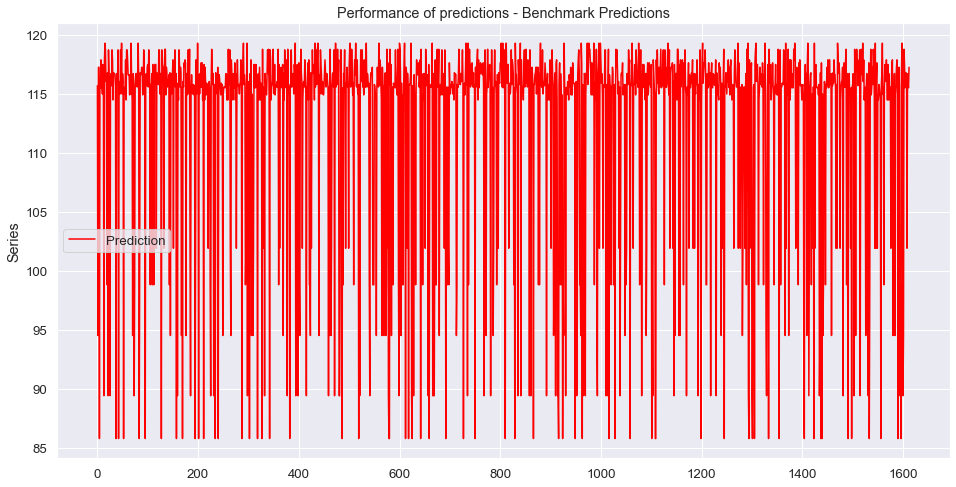

In [19]:
import numpy as np
plt.figure(figsize=(16, 8))
line_up, = plt.plot(prediction,label='Prediction', color="red")
plt.ylabel('Series')
plt.legend(handles=[line_up])
plt.title('Performance of predictions - Benchmark Predictions')
plt.show()

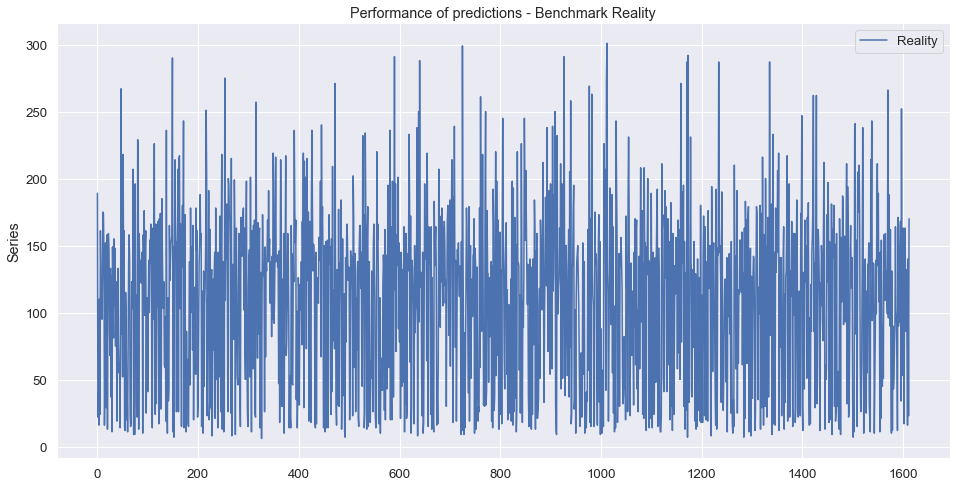

In [20]:
plt.figure(figsize=(16, 8))
line_down, = plt.plot(np.array(testy),label='Reality')
plt.ylabel('Series')
plt.legend(handles=[line_down])
plt.title('Performance of predictions - Benchmark Reality')
plt.show()

In [21]:
trainx.shape

(6451, 3)

### Keras LSTM

In [22]:
trainx.head()

,weekday,month,day
3618,4,04,14
1414,3,04,06
7619,4,04,28
2730,1,04,11
4580,0,04,17


In [23]:
from keras.models import Sequential
from keras.layers import Dense, LSTM
from pandas import DataFrame, concat
from sklearn.preprocessing import MinMaxScaler

In [24]:
X, y = times_series_means.drop(['ToVol','year'],axis=1), times_series_means['ToVol']
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(X)

In [25]:
trainx, testx, trainy, testy = train_test_split(scaled, y, test_size=0.2)

In [26]:
trainx = trainx.reshape((trainx.shape[0], 1, trainx.shape[1]))
testx = testx.reshape((testx.shape[0], 1, testx.shape[1]))

In [27]:
 
# design network
model = Sequential()
model.add(LSTM(50, input_shape=(trainx.shape[1], trainx.shape[2])))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')
# fit network

In [28]:
history = model.fit(trainx, trainy, epochs=20, batch_size=8, validation_data=(testx, testy), verbose=2, shuffle=False)

Epoch 1/20
807/807 - 15s - loss: 95.3279 - val_loss: 81.5550 - 15s/epoch - 19ms/step
Epoch 2/20
807/807 - 8s - loss: 71.1776 - val_loss: 66.6877 - 8s/epoch - 10ms/step
Epoch 3/20
807/807 - 10s - loss: 60.5502 - val_loss: 58.9585 - 10s/epoch - 12ms/step
Epoch 4/20
807/807 - 9s - loss: 55.3250 - val_loss: 55.6650 - 9s/epoch - 12ms/step
Epoch 5/20
807/807 - 11s - loss: 53.3778 - val_loss: 54.7191 - 11s/epoch - 13ms/step
Epoch 6/20
807/807 - 10s - loss: 52.9796 - val_loss: 54.4855 - 10s/epoch - 13ms/step
Epoch 7/20
807/807 - 10s - loss: 52.9014 - val_loss: 54.3983 - 10s/epoch - 12ms/step
Epoch 8/20
807/807 - 9s - loss: 52.8686 - val_loss: 54.3606 - 9s/epoch - 12ms/step
Epoch 9/20
807/807 - 9s - loss: 52.8485 - val_loss: 54.3394 - 9s/epoch - 11ms/step
Epoch 10/20
807/807 - 9s - loss: 52.8324 - val_loss: 54.3263 - 9s/epoch - 11ms/step
Epoch 11/20
807/807 - 10s - loss: 52.8191 - val_loss: 54.3169 - 10s/epoch - 13ms/step
Epoch 12/20
807/807 - 11s - loss: 52.8089 - val_loss: 54.3095 - 11s/epoch

#### Plot history and Evaluation

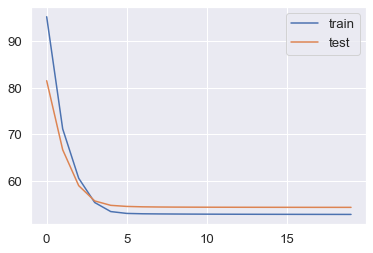

51/51 [==============================] - 1s 4ms/step
Test RMSE: 66.060


In [29]:
from sklearn.metrics import mean_squared_error

plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()
 
# make a prediction
yhat = model.predict(testx)
# calculate RMSE
rmse = np.sqrt(mean_squared_error(testy, yhat))
print('Test RMSE: %.3f' % rmse)